In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [55]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [56]:
data_dir = '../input/gender-classification-dataset'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/Training')
print(classes)

['Validation', 'Training']
['female', 'male']


In [57]:
male_train_files = os.listdir(data_dir + "/Training/male")
print("No. of test examples for male:", len(male_train_files))
print(male_train_files[:5])

No. of test examples for male: 23766
['102461.jpg.jpg', '101609.jpg.jpg', '165682.jpg.jpg', '113410.jpg.jpg', '163489.jpg.jpg']


In [58]:
dataset_train = ImageFolder(data_dir+"/Training", transform=ToTensor())

In [59]:
len(dataset_train)

47009

In [60]:
im_count = 0
for image,_ in dataset_train:
  im_count += 1
  print(image.shape)
  if im_count == 10:
    break 

torch.Size([3, 114, 92])
torch.Size([3, 110, 88])
torch.Size([3, 100, 80])
torch.Size([3, 102, 85])
torch.Size([3, 107, 86])
torch.Size([3, 102, 79])
torch.Size([3, 104, 89])
torch.Size([3, 99, 78])
torch.Size([3, 98, 76])
torch.Size([3, 118, 84])


In [61]:
dataset_train.classes

['female', 'male']

In [62]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.Resize((100, 100)), transforms.ToTensor()])

In [63]:
dataset_train = ImageFolder(data_dir+"/Training", transform = transform)

In [64]:
dataset_val = ImageFolder(data_dir+"/Validation", transform = transform)

In [65]:
dataset_train[0]

(tensor([[[0.1490, 0.1647, 0.1686,  ..., 0.2118, 0.2118, 0.1843],
          [0.1294, 0.1333, 0.1216,  ..., 0.2235, 0.2118, 0.2549],
          [0.1098, 0.1255, 0.1216,  ..., 0.2471, 0.2392, 0.2549],
          ...,
          [0.0667, 0.0471, 0.0431,  ..., 0.0471, 0.0784, 0.0863],
          [0.0627, 0.0392, 0.0353,  ..., 0.0667, 0.0667, 0.0588],
          [0.0627, 0.0392, 0.0353,  ..., 0.0784, 0.0706, 0.0588]],
 
         [[0.1490, 0.1647, 0.1686,  ..., 0.2118, 0.2118, 0.1843],
          [0.1294, 0.1333, 0.1216,  ..., 0.2235, 0.2118, 0.2549],
          [0.1098, 0.1255, 0.1216,  ..., 0.2471, 0.2392, 0.2549],
          ...,
          [0.1098, 0.0902, 0.0745,  ..., 0.0510, 0.0863, 0.0941],
          [0.0980, 0.0745, 0.0627,  ..., 0.0706, 0.0706, 0.0627],
          [0.0941, 0.0706, 0.0588,  ..., 0.0784, 0.0706, 0.0588]],
 
         [[0.1412, 0.1569, 0.1608,  ..., 0.2196, 0.2196, 0.1922],
          [0.1216, 0.1255, 0.1137,  ..., 0.2314, 0.2196, 0.2627],
          [0.1020, 0.1176, 0.1137,  ...,

In [66]:
im_count = 0
for image,_ in dataset_train:
  im_count += 1
  print(image.shape)
  if im_count == 10:
    break 

torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])
torch.Size([3, 100, 100])


In [67]:
img, label = dataset_train[2500]
print(img.shape, label)

torch.Size([3, 100, 100]) 0


In [68]:
def show_example(img,label):
  print('Label: ', classes[label], '('+str(label)+')')
  plt.imshow(img.permute(1, 2, 0))

Label:  male (1)


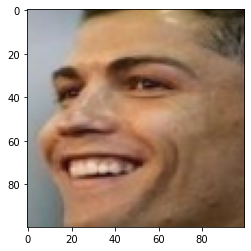

In [69]:
show_example(*dataset_train[31419])

# Trainning

In [70]:
random_seed = 0
torch.manual_seed(random_seed)

In [71]:
len(dataset_train)

47009

In [72]:
len(dataset_val)

11649

In [73]:
train_size = 45000
val_size = len(dataset_train) - train_size

data_train, data_val = random_split(dataset_train, [train_size, val_size])
len(data_train), len(data_val)

(45000, 2009)

In [74]:
from torch.utils.data.dataloader import DataLoader

batch_size = 128

In [75]:
train_dl = DataLoader(data_train, batch_size, shuffle = True, num_workers= 4, pin_memory=True)
val_dl = DataLoader(data_val, batch_size*2, num_workers=4, pin_memory=True)
test_dl = DataLoader(dataset_val, batch_size*2, num_workers=4, pin_memory=True)

In [76]:
from torchvision.utils import make_grid

def show_batch(dl):
  for img, label in dl:
    fig, ax = plt.subplots(figsize = (16, 12))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(img, nrow = 16).permute(1,2,0))
    break

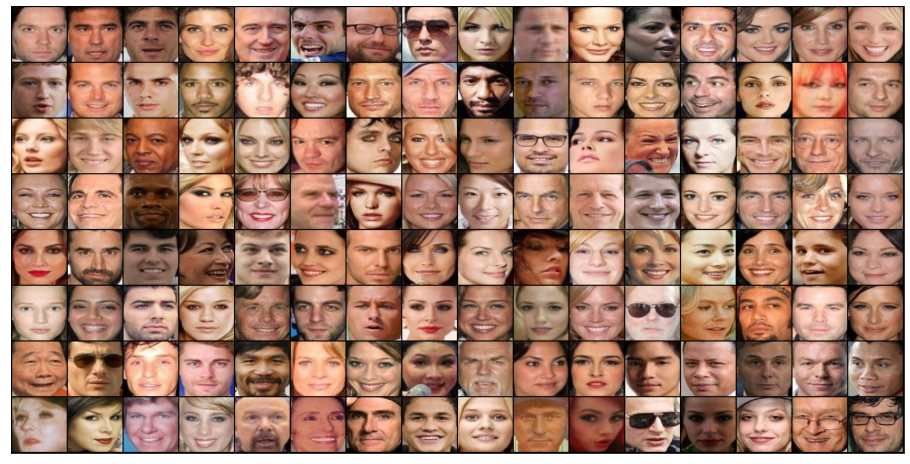

In [77]:
show_batch(train_dl)

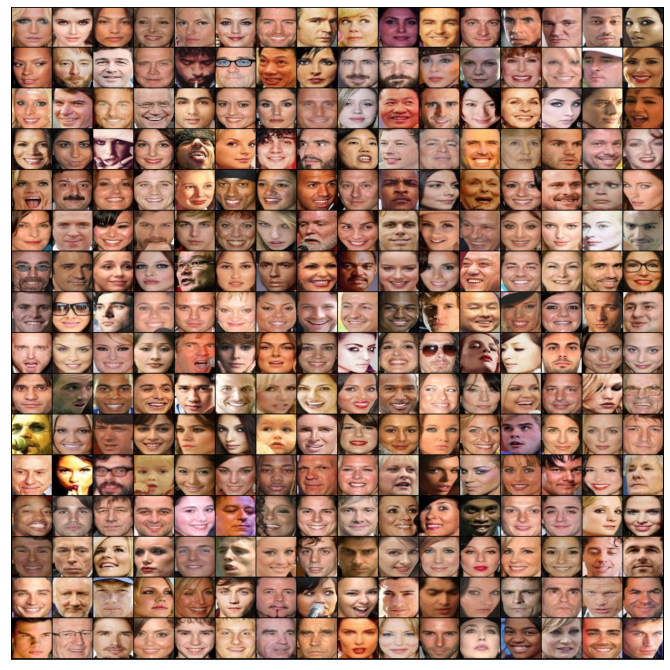

In [78]:
show_batch(val_dl)

# Modelling

In [79]:
import torch.nn as nn
import torch.nn.functional as F

In [80]:
sample_model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, padding=1),
    nn.MaxPool2d(2, 2)
)

In [81]:
for images, labels in train_dl:
    print("images shape: ", images.shape)
    out = sample_model(images)
    print("out shape", out.shape)
    break

images shape:  torch.Size([128, 3, 100, 100])
out shape torch.Size([128, 32, 50, 50])


In [82]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [83]:
class GenCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 64 x 50 x 50
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 128 x 25 x 25
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 256 x 12 x 12
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(512, 512, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Output size: 512 x 6 x 6
            
            nn.Flatten(),
            nn.Linear(512*6*6, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 2))
        
    def forward(self, xb):
        return self.network(xb)

In [84]:
model = GenCnnModel()
model

GenCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 

In [85]:
for images, labels in train_dl:
    print("images shape: ", images.shape)
    out = model(images)
    print("out shape: ", out.shape)
    print("out[0]: ", out[0])
    break

images shape:  torch.Size([128, 3, 100, 100])
out shape:  torch.Size([128, 2])
out[0]:  tensor([-0.1426, -0.1071], grad_fn=<SelectBackward>)


In [86]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")
device

device(type='cuda')

In [87]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [88]:
train_loader = DeviceDataLoader(train_dl, device)
val_loader = DeviceDataLoader(val_dl, device)
test_loader = DeviceDataLoader(test_dl, device)
to_device(model, device);

# Trainning the model

In [89]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [90]:
model = to_device(GenCnnModel(), device)

In [91]:
model

GenCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): ReLU()
    (17): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 

In [92]:
evaluate(model, val_loader)

{'val_loss': 0.6933600306510925, 'val_acc': 0.5009135603904724}

In [93]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [94]:
history = fit(num_epochs, lr, model, train_loader, val_loader, opt_func)

Epoch [0], train_loss: 0.6932, val_loss: 0.6935, val_acc: 0.4991
Epoch [1], train_loss: 0.3824, val_loss: 0.2182, val_acc: 0.9179
Epoch [2], train_loss: 0.1605, val_loss: 0.1297, val_acc: 0.9565
Epoch [3], train_loss: 0.1324, val_loss: 0.1220, val_acc: 0.9580
Epoch [4], train_loss: 0.1188, val_loss: 0.1147, val_acc: 0.9609
Epoch [5], train_loss: 0.1100, val_loss: 0.1069, val_acc: 0.9633
Epoch [6], train_loss: 0.1020, val_loss: 0.1174, val_acc: 0.9600
Epoch [7], train_loss: 0.0940, val_loss: 0.1059, val_acc: 0.9648
Epoch [8], train_loss: 0.0883, val_loss: 0.1172, val_acc: 0.9664
Epoch [9], train_loss: 0.0821, val_loss: 0.1211, val_acc: 0.9659


In [95]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [96]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

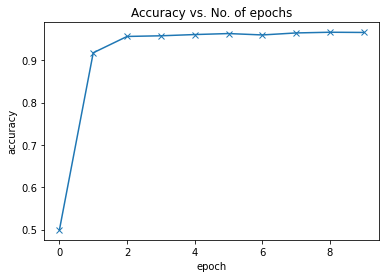

In [97]:
plot_accuracies(history)

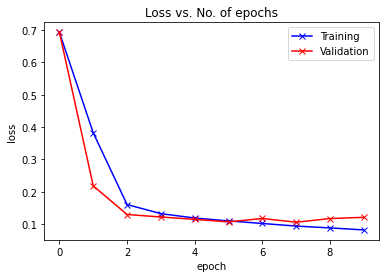

In [98]:
plot_losses(history)

## Predicting test results

In [99]:
result = evaluate(model, test_loader)
result

{'val_loss': 0.09941964596509933, 'val_acc': 0.9655349850654602}

In [100]:
torch.save(model.state_dict(), 'genClass-Cnn.pth')

In [101]:
model2 = to_device(GenCnnModel(), device)

In [102]:
model2.load_state_dict(torch.load('genClass-Cnn.pth'))

<All keys matched successfully>

In [103]:
evaluate(model2, test_loader)

{'val_loss': 0.09941964596509933, 'val_acc': 0.9655349850654602}

## Testing with individual images

In [104]:
def predicted_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    
    return dataset_train.classes[preds[0].item()]

Label:  female Predicted:  female


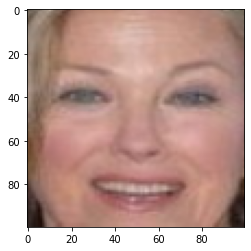

In [105]:
img, label = dataset_val[1201]
plt.imshow(img.permute(1,2,0))
print('Label: ', dataset_train.classes[label], 'Predicted: ', predicted_image(img, model2))

## Predicting images on loaded model

In [107]:
import os
os.chdir(r'./')
from IPython.display import FileLink
FileLink(r'genClass-Cnn.pth')

/kaggle/working/genClass-Cnn.pth

In [108]:
loaded_model = GenCnnModel()

In [109]:
loaded_model.load_state_dict(torch.load('genClass-Cnn.pth'))

<All keys matched successfully>

In [110]:
evaluate(loaded_model, test_dl)

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same